In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n_harm = 10
f_root = 440
f_sample = 48000

In [3]:
itap = np.ceil(f_sample/f_root) + np.arange(-n_harm, n_harm)

In [4]:
ph0 = (itap * f_root / f_sample - 1)[None, :] * np.arange(1, n_harm+1)[:, None]

In [5]:
phase = -2*np.pi*ph0

In [6]:
lhs = np.concatenate((np.cos(phase), np.sin(phase)))

In [7]:
rhs = np.concatenate((np.ones(n_harm), np.zeros(n_harm)))

In [8]:
coeffs = np.linalg.solve(lhs, rhs)

In [9]:
coeffs

array([ 1.06088600e-07,  3.33464823e-06, -7.23792174e-05,  6.28565938e-04,
       -3.34410452e-03,  1.25400055e-02, -3.57020278e-02,  8.17695358e-02,
       -1.66576043e-01,  1.11558256e+00, -5.54513169e-02,  1.01467997e-01,
       -8.67585691e-02,  5.52462912e-02, -2.72788308e-02,  1.03712762e-02,
       -2.94732408e-03,  5.91256123e-04, -7.48369635e-05,  4.50238173e-06])

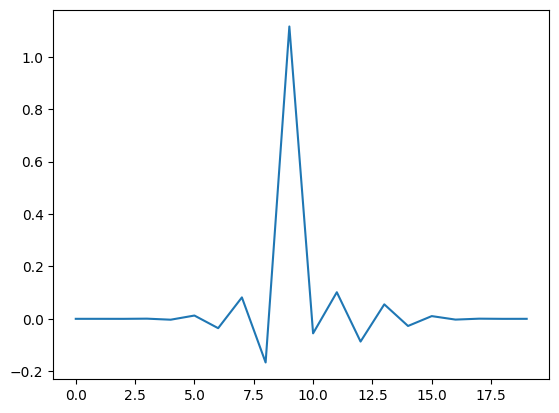

In [10]:
fig, ax = plt.subplots(1)
ax.plot(coeffs)

In [11]:
test_phase = np.arange(n_harm*2) * -2*np.pi * f_root/4*np.arange(1, 51)[:,None]/f_sample

In [12]:
transf = (coeffs*np.exp(1j * test_phase)).sum(axis=-1)

In [13]:
angle = np.angle(transf)

In [14]:
angle / angle[3]

array([ 2.50000000e-01,  5.00000000e-01,  7.50000000e-01,  1.00000000e+00,
        1.25000000e+00,  1.50000000e+00,  1.75000000e+00,  2.00000000e+00,
        2.25000000e+00,  2.50000000e+00,  2.75000000e+00,  3.00000000e+00,
        3.25000000e+00,  3.50000000e+00,  3.75000000e+00,  4.00000000e+00,
        4.25000000e+00,  4.50000000e+00,  4.75000000e+00,  5.00000000e+00,
        5.25000000e+00,  5.50000000e+00,  5.75000000e+00,  6.00000000e+00,
       -5.75000000e+00, -5.50000000e+00, -5.25000000e+00, -5.00000000e+00,
       -4.75000000e+00, -4.50000000e+00, -4.25000000e+00, -4.00000000e+00,
       -3.75000000e+00, -3.50000000e+00, -3.25000000e+00, -3.00000000e+00,
       -2.75000000e+00, -2.50000000e+00, -2.25000000e+00, -2.00000000e+00,
       -1.75000000e+00, -1.50000000e+00, -1.25000000e+00, -1.00000000e+00,
       -7.50000000e-01, -5.00000000e-01, -2.50000000e-01, -1.09383662e-10,
        2.50000000e-01,  5.00000000e-01])

In [15]:
np.abs(transf)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])